# Theory Questions

## 2.1

Point cloud data is a type of 3D representation commonly used in medical image processing, particularly in the field of medical imaging and analysis. In this context, point clouds are generated from various imaging modalities such as computed tomography (CT) scans, magnetic resonance imaging (MRI), or ultrasound.

A point cloud is a collection of data points in a 3D coordinate system, where each point represents a specific location in space and may carry additional attributes such as intensity or color. In medical image processing, these points typically correspond to sampled locations on the surfaces or boundaries of anatomical structures or lesions within the patient's body.

Point clouds are advantageous in medical image processing for several reasons:

1. Accurate 3D Representation: Point clouds provide a faithful representation of the complex anatomical structures and their spatial relationships in 3D space. By capturing the geometric details of the surfaces or boundaries of organs or lesions, point clouds offer a more accurate and comprehensive representation compared to traditional 2D slices.

2. Precise Measurements: Point clouds enable precise measurements of anatomical structures. Various geometric and spatial analyses can be performed on the point cloud data to extract measurements such as distances, volumes, curvatures, or angles. This information is valuable for diagnostic purposes, treatment planning, and monitoring disease progression.

3. Surface Reconstruction: Point clouds can be used to reconstruct the 3D surfaces of anatomical structures. Surface reconstruction techniques, such as triangulation or mesh generation, can be applied to the point cloud data to create a continuous and smooth representation of the object's surface. This allows for detailed visualization and interaction with the 3D models.

4. Registration and Alignment: Point clouds can be used for registration and alignment of medical images. By matching the corresponding points in two or more point clouds, image registration techniques can align images from different modalities or time points. This is crucial for tasks such as image fusion, change detection, or tracking the progression of a disease.

5. Segmentation and Object Extraction: Point cloud data can be used for segmenting and extracting specific objects or regions of interest within the medical images. Point cloud-based segmentation algorithms can identify anatomical structures or lesions based on their geometric properties, such as shape, size, or curvature. This facilitates automated or semi-automated analysis and reduces the need for manual delineation.

In summary, point cloud data plays a significant role in medical image processing by providing accurate 3D representations, enabling precise measurements, facilitating surface reconstruction, aiding in registration and alignment, and assisting with segmentation and object extraction. These capabilities contribute to improved diagnosis, treatment planning, surgical guidance, and research in the field of medical imaging.

## 3.1

**Hausdorff Distance (HD):**
Hausdorff Distance is a measure of dissimilarity or distance between two sets of points or contours. In medical image processing, it is commonly used to evaluate the similarity between a reference segmentation (ground truth) and a segmented region (result of an algorithm or manual segmentation). The HD metric measures the maximum distance between a point on one contour and its nearest point on the other contour. It quantifies the largest discrepancy between the boundaries of the two regions, providing a measure of dissimilarity. A lower HD value indicates a better match between the two contours.

**Dice Score (DS):**
The Dice Score, also known as the Sørensen-Dice coefficient, is a commonly used similarity metric for evaluating the overlap or similarity between two regions of interest (ROIs) in medical image segmentation. It is defined as twice the intersection of the two regions divided by the sum of their individual volumes. Mathematically, it can be expressed as (2 * TP) / (2 * TP + FP + FN), where TP is the true positive (intersection between the reference and segmented regions), FP is the false positive (segmented region not present in the reference), and FN is the false negative (reference region not present in the segmented result). The DS ranges from 0 to 1, with 1 indicating a perfect match between the ROIs.

**Average Surface Distances (ASD):**
Average Surface Distances measure the average distance between the surfaces of two objects or regions. It is commonly used to evaluate the accuracy of segmentation results by quantifying the differences between the segmented boundary and the ground truth boundary. The ASD is calculated by computing the distance between each point on the segmented boundary and its nearest point on the ground truth boundary. The distances are then averaged to obtain a single value representing the average surface difference between the two regions. A lower ASD value indicates a higher level of accuracy in the segmentation.

These metrics provide quantitative measures to assess the performance and accuracy of segmentation algorithms or manual segmentations in medical image analysis. They are used to compare the agreement between the segmented results and the ground truth, allowing for evaluation and validation of various image processing techniques, algorithm optimizations, or inter-observer variabilities in medical image interpretation.

# Practical Questions

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.spatial.distance import directed_hausdorff
from google.colab import drive

## Part 1

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!mkdir 'main'
!unrar x 'gdrive/MyDrive/Colab Notebooks/data/Data_Question4.rar' -C 'main'


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from gdrive/MyDrive/Colab Notebooks/data/Data_Question4.rar

Creating    main/Healthy_sample                                       OK
Extracting  main/Healthy_sample/00.nii                                     4%  8% 12% 16% 19%  OK 
Extracting  main/Healthy_sample/00.png                                    21%  OK 
Extracting  main/Healthy_sample/00_mask.nii                               21%  OK 
Creating    main/S02                                                  OK
Extracting  main/S02/pat2.nii                                             25% 29% 30%  OK 
Extracting  main/S02/pat2_label.nii                                       30%  OK 
Creating    main/S03                                                  OK
Extracting  main/S03/pat3.nii                                             34% 37%  OK 
Extracting  main/S03/pat3

In [21]:
healthy_images = nib.load('main/Healthy_sample/00.nii').get_fdata()
mask = nib.load('main/Healthy_sample/00_mask.nii').get_fdata()

dataset = {}
for i in [2, 3, 4, 5, 6]:
    images = nib.load('main/S0' + str(i) + '/pat' + str(i) + '.nii').get_fdata()
    labels = nib.load('main/S0' + str(i) + '/pat' + str(i) + '_label.nii').get_fdata()
    dataset['S'+str(i)] = (images, labels)

print(healthy_images.shape)

(183, 176, 266)


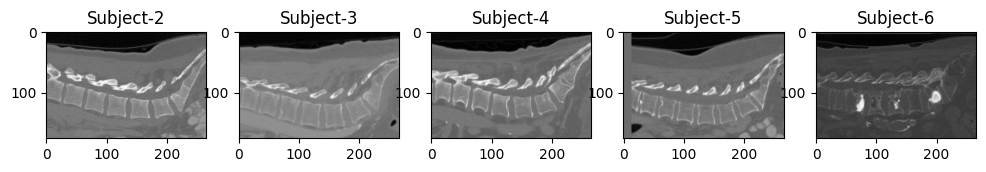

In [25]:
plt.figure(figsize=(12, 8))
for i in [2, 3, 4, 5, 6]:
    image = dataset['S' + str(i)][0][99]
    plt.subplot(1, 5, i-1)
    plt.imshow(image, cmap='gray')
    plt.title('Subject-' + str(i))
plt.show()

## Part 2

## Part 3

In [26]:
def calculate_hausdorff_distance(mask1, mask2):
    coords_mask1 = np.array(np.where(mask1)).T
    coords_mask2 = np.array(np.where(mask2)).T
    hausdorff_distance_1 = directed_hausdorff(coords_mask1, coords_mask2)[0]
    hausdorff_distance_2 = directed_hausdorff(coords_mask2, coords_mask1)[0]
    return max(hausdorff_distance_1, hausdorff_distance_2)


def calculate_dice_score(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    dice_score = (2.0 * intersection.sum()) / (mask1.sum() + mask2.sum())
    return dice_score


def calculate_average_surface_distance(mask1, mask2):
    coords_mask1 = np.array(np.where(mask1)).T
    coords_mask2 = np.array(np.where(mask2)).T
    distances = np.linalg.norm(coords_mask1[:, np.newaxis] - coords_mask2, axis=-1)
    average_surface_distance = np.mean(np.min(distances, axis=1))
    return average_surface_distance

In [27]:
mask1 = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]])

mask2 = np.array([[1, 0, 1],
                  [0, 1, 0],
                  [1, 0, 1]])

hausdorff_distance = calculate_hausdorff_distance(mask1, mask2)
dice_score = calculate_dice_score(mask1, mask2)
average_surface_distance = calculate_average_surface_distance(mask1, mask2)

print("Hausdorff Distance:", hausdorff_distance)
print("Dice Score:", dice_score)
print("Average Surface Distance:", average_surface_distance)

Hausdorff Distance: 1.0
Dice Score: 0.2
Average Surface Distance: 0.8


## Part 4